In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [13]:
df = pd.read_csv('data/clean_data.csv').iloc[:,1:]
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.head()

,Date,G,Home,Team,Opp,Win,Season,Year,Month,TmPts_per_G,OppPts_per_G,FG_per_G,FGA_per_G,FG%_per_G,3P_per_G,3PA_per_G,3P%_per_G,FT_per_G,FTA_per_G,FT%_per_G,ORB_per_G,TRB_per_G,AST_per_G,STL_per_G,BLK_per_G,TOV_per_G,PF_per_G,ORtg_per_G,DRtg_per_G,Pace_per_G,FTr_per_G,3PAr_per_G,TS%_per_G,TRB%_per_G,AST%_per_G,STL%_per_G,BLK%_per_G,eFG%_per_G,TOV%_per_G,ORB%_per_G,FT/FGA_per_G,D-eFG%_per_G,D-TOV%_per_G,D-DRB%_per_G,D-FT/FGA_per_G
0,2009-10-28,1.0,1,ATL,IND,1,2010,2009,10,102.411765,97.470588,39.294118,83.941176,0.469235,6.176471,18.058824,0.348882,17.647059,22.647059,0.766588,11.941176,42.470588,20.352941,6.882353,6.529412,12.235294,20.411765,111.688235,106.541176,90.976471,0.270059,0.215824,0.545824,50.576471,51.429412,7.476471,9.888235,0.506294,11.535294,28.417647,0.210588,0.493706,12.923529,72.876471,0.188
1,2009-10-30,2.0,1,ATL,WAS,1,2010,2009,10,102.411765,97.470588,39.294118,83.941176,0.469235,6.176471,18.058824,0.348882,17.647059,22.647059,0.766588,11.941176,42.470588,20.352941,6.882353,6.529412,12.235294,20.411765,111.688235,106.541176,90.976471,0.270059,0.215824,0.545824,50.576471,51.429412,7.476471,9.888235,0.506294,11.535294,28.417647,0.210588,0.493706,12.923529,72.876471,0.188
2,2009-11-01,3.0,0,ATL,LAL,0,2010,2009,11,102.411765,97.470588,39.294118,83.941176,0.469235,6.176471,18.058824,0.348882,17.647059,22.647059,0.766588,11.941176,42.470588,20.352941,6.882353,6.529412,12.235294,20.411765,111.688235,106.541176,90.976471,0.270059,0.215824,0.545824,50.576471,51.429412,7.476471,9.888235,0.506294,11.535294,28.417647,0.210588,0.493706,12.923529,72.876471,0.188
3,2009-11-03,4.0,0,ATL,POR,1,2010,2009,11,102.411765,97.470588,39.294118,83.941176,0.469235,6.176471,18.058824,0.348882,17.647059,22.647059,0.766588,11.941176,42.470588,20.352941,6.882353,6.529412,12.235294,20.411765,111.688235,106.541176,90.976471,0.270059,0.215824,0.545824,50.576471,51.429412,7.476471,9.888235,0.506294,11.535294,28.417647,0.210588,0.493706,12.923529,72.876471,0.188
4,2009-11-04,5.0,0,ATL,SAC,1,2010,2009,11,102.411765,97.470588,39.294118,83.941176,0.469235,6.176471,18.058824,0.348882,17.647059,22.647059,0.766588,11.941176,42.470588,20.352941,6.882353,6.529412,12.235294,20.411765,111.688235,106.541176,90.976471,0.270059,0.215824,0.545824,50.576471,51.429412,7.476471,9.888235,0.506294,11.535294,28.417647,0.210588,0.493706,12.923529,72.876471,0.188


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26142 entries, 0 to 26141
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            26142 non-null  datetime64[ns]
 1   G               26142 non-null  float64       
 2   Home            26142 non-null  int64         
 3   Team            26142 non-null  object        
 4   Opp             26142 non-null  object        
 5   Win             26142 non-null  int64         
 6   Season          26142 non-null  int64         
 7   Year            26142 non-null  int64         
 8   Month           26142 non-null  int64         
 9   TmPts_per_G     26142 non-null  float64       
 10  OppPts_per_G    26142 non-null  float64       
 11  FG_per_G        26142 non-null  float64       
 12  FGA_per_G       26142 non-null  float64       
 13  FG%_per_G       26142 non-null  float64       
 14  3P_per_G        26142 non-null  float64       
 15  3P

### EDA

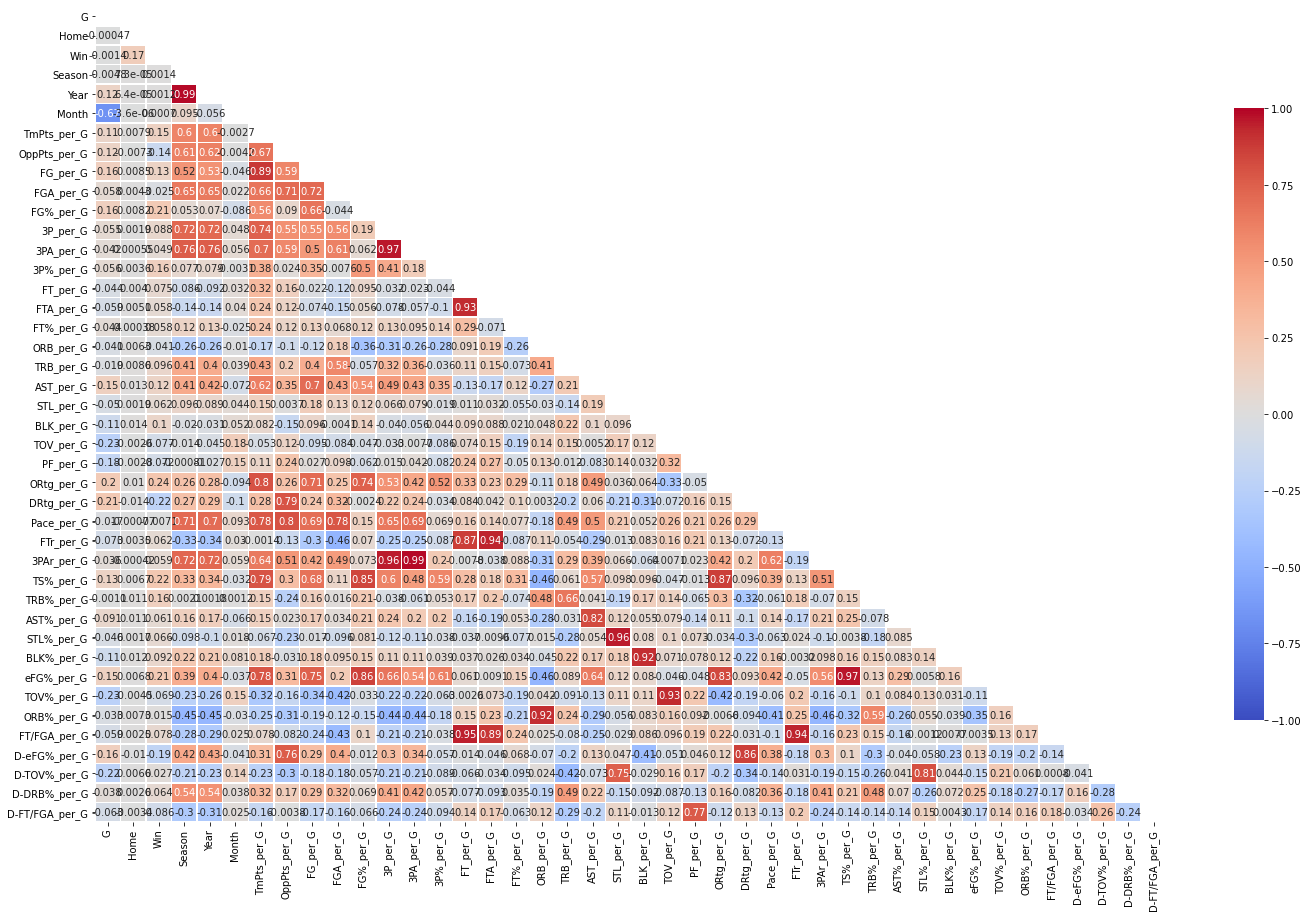

In [20]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
f, ax = plt.subplots(figsize=(24,15))
ax = sns.heatmap(df.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True, vmin = -1, vmax=1, cbar_kws = {"shrink": .75})